<a href="https://colab.research.google.com/github/taniyasinghsisodia/Deep-Learning-Projects/blob/master/TF_Serving_4_July_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.2.0'

# **Add the TensorFlow Serving distribution as a package source:**

In [3]:
!echo "deb [arch=amd64] http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | sudo tee /etc/apt/sources.list.d/tensorflow-serving.list && \
curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | sudo apt-key add -

deb [arch=amd64] http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2943  100  2943    0     0  15408      0 --:--:-- --:--:-- --:--:-- 15408
OK


In [4]:
!sudo apt-get update

Get:1 http://storage.googleapis.com/tensorflow-serving-apt stable InRelease [3,012 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Get:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release [564 B]
Get:6 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Get:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release.gpg [833 B]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:12 http://storage.googleapis.com/tensorflow-serving-apt stable/tensorflow-model-server amd64 Packages [3

In [5]:
!sudo apt-get install tensorflow-model-server

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  tensorflow-model-server
0 upgraded, 1 newly installed, 0 to remove and 43 not upgraded.
Need to get 187 MB of archives.
After this operation, 0 B of additional disk space will be used.
Get:1 http://storage.googleapis.com/tensorflow-serving-apt stable/tensorflow-model-server amd64 tensorflow-model-server all 2.2.0 [187 MB]
Fetched 187 MB in 2s (75.2 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)

In [6]:
from tensorflow.keras import datasets

# loading dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# For training, we will use 10000 images 
# And we will test our model on 1000 images
train_labels = train_labels[:10000]
test_labels = test_labels[:1000]

train_images = train_images[:10000].reshape(-1, 28 * 28) / 255.0
test_images = test_images[:1000].reshape(-1, 28 * 28) / 255.0

11493376/11490434 [==============================] - 0s 0us/step


In [7]:
train_images.shape

(10000, 784)

In [8]:
len(train_labels)

10000

In [9]:
input_ = tf.keras.layers.Input((784,))
x = tf.keras.layers.Dense(units=512,activation='relu')(input_)
output = tf.keras.layers.Dense(units = 10 ,activation='softmax')(x)


In [10]:
model = tf.keras.models.Model(inputs=input_,outputs=output)

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [13]:
model.fit(train_images,train_labels,epochs=10, validation_data=(test_images,test_labels))

Epoch 1/10
313/313 [==============================] - 1s 3ms/step - loss: 0.4119 - accuracy: 0.8824 - val_loss: 0.2721 - val_accuracy: 0.9130
Epoch 2/10
313/313 [==============================] - 1s 2ms/step - loss: 0.1756 - accuracy: 0.9494 - val_loss: 0.2161 - val_accuracy: 0.9320
Epoch 3/10
313/313 [==============================] - 1s 2ms/step - loss: 0.1102 - accuracy: 0.9669 - val_loss: 0.1773 - val_accuracy: 0.9420
Epoch 4/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0743 - accuracy: 0.9785 - val_loss: 0.1417 - val_accuracy: 0.9560
Epoch 5/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0479 - accuracy: 0.9870 - val_loss: 0.1557 - val_accuracy: 0.9460
Epoch 6/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0328 - accuracy: 0.9926 - val_loss: 0.1787 - val_accuracy: 0.9470
Epoch 7/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0199 - accuracy: 0.9962 - val_loss: 0.1327 - val_accuracy: 0.9570
Epoch 

In [14]:
loss, acc = model.evaluate(test_images,  test_labels, verbose=2)
print("model, accuracy: {:5.2f}%".format(100*acc))

32/32 - 0s - loss: 0.1231 - accuracy: 0.9610
model, accuracy: 96.10%


# **Saving a Model**

In [29]:
import tempfile
import os
MODEL_DIR = tempfile.gettempdir()
version = 1
export_path = os.path.join(MODEL_DIR, str(version))
print('export_path = {}\n'.format(export_path))

tf.keras.models.save_model(
    model,
    export_path,
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    options=None
)

print('\nSaved model:')
!ls -l {export_path}

export_path = /tmp/1

INFO:tensorflow:Assets written to: /tmp/1/assets

Saved model:
total 76
drwxr-xr-x 2 root root  4096 Jul  4 06:12 assets
-rw-r--r-- 1 root root 69025 Jul  4 06:12 saved_model.pb
drwxr-xr-x 2 root root  4096 Jul  4 06:12 variables


In [30]:
!saved_model_cli show --dir {export_path} --all


MetaGraphDef with tag-set: 'serve' contains the following SignatureDefs:

signature_def['__saved_model_init_op']:
  The given SavedModel SignatureDef contains the following input(s):
  The given SavedModel SignatureDef contains the following output(s):
    outputs['__saved_model_init_op'] tensor_info:
        dtype: DT_INVALID
        shape: unknown_rank
        name: NoOp
  Method name is: 

signature_def['serving_default']:
  The given SavedModel SignatureDef contains the following input(s):
    inputs['input_1'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 784)
        name: serving_default_input_1:0
  The given SavedModel SignatureDef contains the following output(s):
    outputs['dense_1'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 10)
        name: StatefulPartitionedCall:0
  Method name is: tensorflow/serving/predict
W0704 06:13:52.397833 140585204000640 deprecation.py:506] From /usr/local/lib/python2.7/dist-packages/tensorflow_core/python/ops/resource

In [31]:
!echo "deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | tee /etc/apt/sources.list.d/tensorflow-serving.list && \
curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | apt-key add -
!apt update

deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2943  100  2943    0     0   114k      0 --:--:-- --:--:-- --:--:--  114k
OK
Hit:1 http://storage.googleapis.com/tensorflow-serving-apt stable InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease
Hit:7 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:8 http://security.

In [32]:
!apt-get install tensorflow-model-server

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tensorflow-model-server is already the newest version (2.2.0).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 43 not upgraded.


In [33]:
os.environ["MODEL_DIR"] = MODEL_DIR

In [34]:
%%bash --bg 
nohup tensorflow_model_server \
  --rest_api_port=8501 \
  --model_name=fashion_model \
  --model_base_path="${MODEL_DIR}" >server.log 2>&1

Starting job # 0 in a separate thread.


In [35]:
!tail server.log

2020-07-04 06:15:23.495122: I external/org_tensorflow/tensorflow/core/platform/cpu_feature_guard.cc:143] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2020-07-04 06:15:23.508407: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:234] Restoring SavedModel bundle.
2020-07-04 06:15:23.529519: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:183] Running initialization op on SavedModel bundle at path: /tmp/1
2020-07-04 06:15:23.533047: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:364] SavedModel load for tags { serve }; Status: success: OK. Took 39055 microseconds.
2020-07-04 06:15:23.533404: I tensorflow_serving/servables/tensorflow/saved_model_warmup.cc:105] No warmup data file found at /tmp/1/assets.extra/tf_serving_warmup_requests
2020-07-04 06:15:23.533502: I tensorflow_serving/core/loader_harness.cc:87] Successfully loaded servable version {name: fashion_model version: 1}
2020-07-04 06:15:23.5345

# **Use the saved model to make predictions**

In [16]:
# import load_model
from tensorflow.keras.models import load_model

# give the path to model directory to load the model
loaded_model = tf.keras.models.load_model('my_model/1/')

# predict function to predict the probabilities for each class 0-9
loaded_model.predict(test_images[0:1])


array([[1.6927183e-09, 6.8249531e-11, 1.1241314e-06, 5.9896865e-05,
        4.1180010e-13, 4.3300412e-09, 1.5871124e-14, 9.9993873e-01,
        6.0981812e-08, 1.4773265e-07]], dtype=float32)

In [17]:
test_images.shape

(1000, 784)

In [18]:
import numpy as np
np.argmax(loaded_model.predict(test_images[0:1]))


7

# **starting the server**

Random Number Generated:  190 Image Label :  1


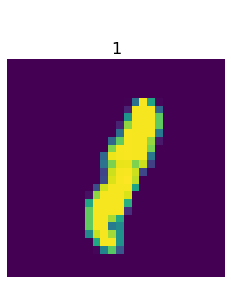

In [22]:
from skimage import io
import matplotlib.pyplot as plt
%matplotlib inline
import random

# function to display image
def show(idx, title):
    plt.figure()
    plt.imshow(test_images[idx].reshape(28,28))
    plt.axis('off')
    plt.title('\n\n{}'.format(test_labels[idx]), fontdict={'size': 16})

# generate a random index
r = random.randint(0,len(test_images)-1)

#
print("Random Number Generated: ", r, "Image Label : ", test_labels[r])
show(r, 'Image: {}'.format(test_images[r]))

In [36]:
data = json.dumps({"signature_name": "serving_default", "instances": test_images[0:3].tolist()})
print('Data: {} ... {}'.format(data[:50], data[len(data)-52:]))

Data: {"signature_name": "serving_default", "instances": ...  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]}


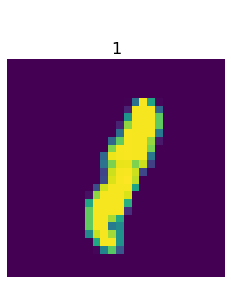

In [38]:
import requests
headers = {"content-type": "application/json"}
json_response = requests.post('http://localhost:8501/v1/models/fashion_model:predict', data=data, headers=headers)
predictions = json.loads(json_response.text)['predictions']

show(r, 'Image: {}'.format(test_images[r]))

In [39]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TF Lite model.
with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)
